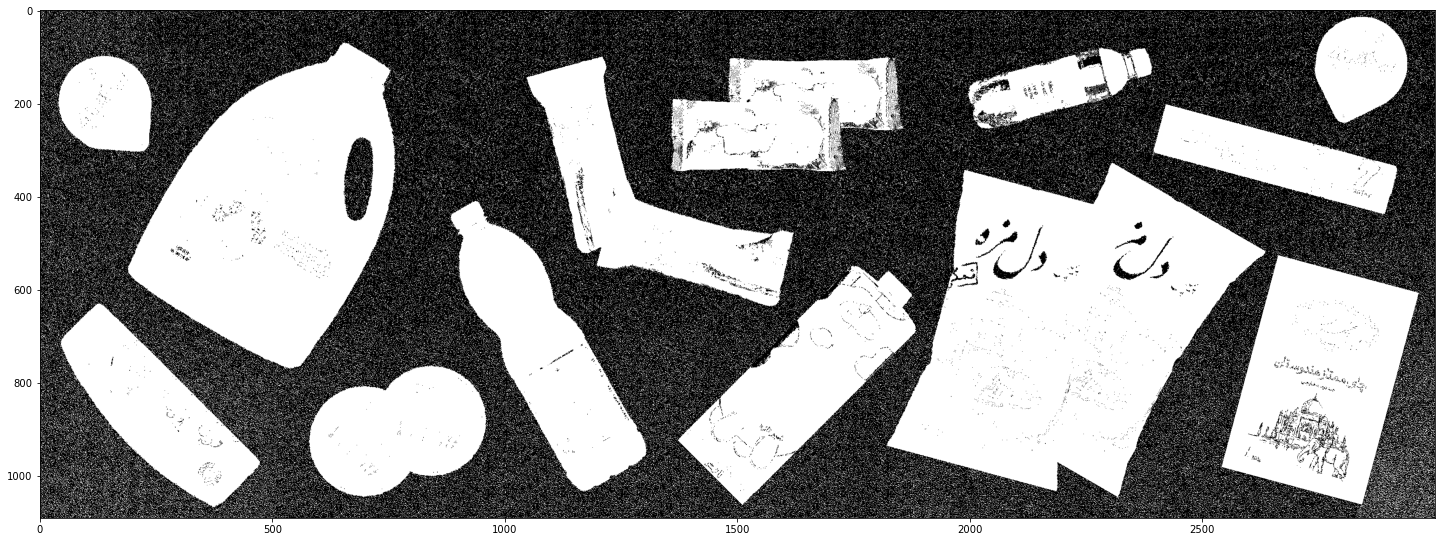

In [2]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
image = cv2.imread('inputs/P3/cart_2.png')
image = image[:][52:-57]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
binary = np.zeros(gray.shape)
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if image[i][j][0] == image[i][j][1] and image[i][j][2] == image[i][j][1] and image[i][j][1]<190 and image[i][j][1]>25:
            binary[i][j] = 0
        else :
            binary[i][j] = 255


plt.figure(figsize=(25,15))
plt.imshow(binary,cmap="gray")
plt.show()

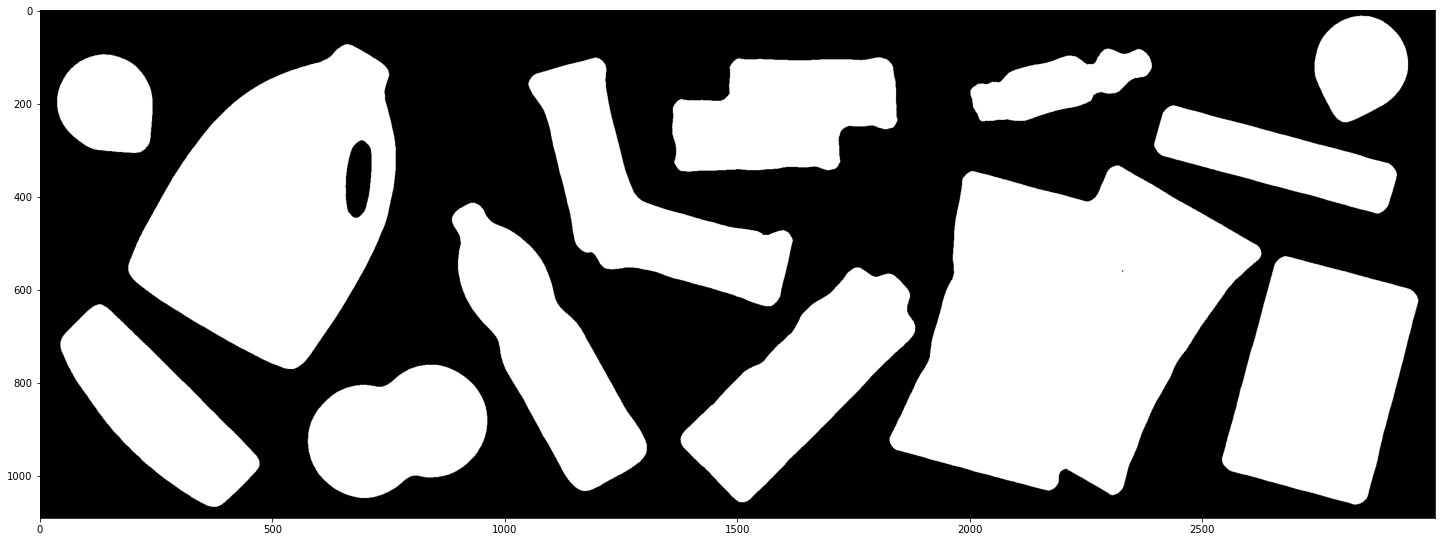

In [3]:
image_blur = cv2.medianBlur(np.uint8(binary),37)
plt.figure(figsize=(25,15))
plt.imshow(image_blur,cmap="gray")
plt.show()

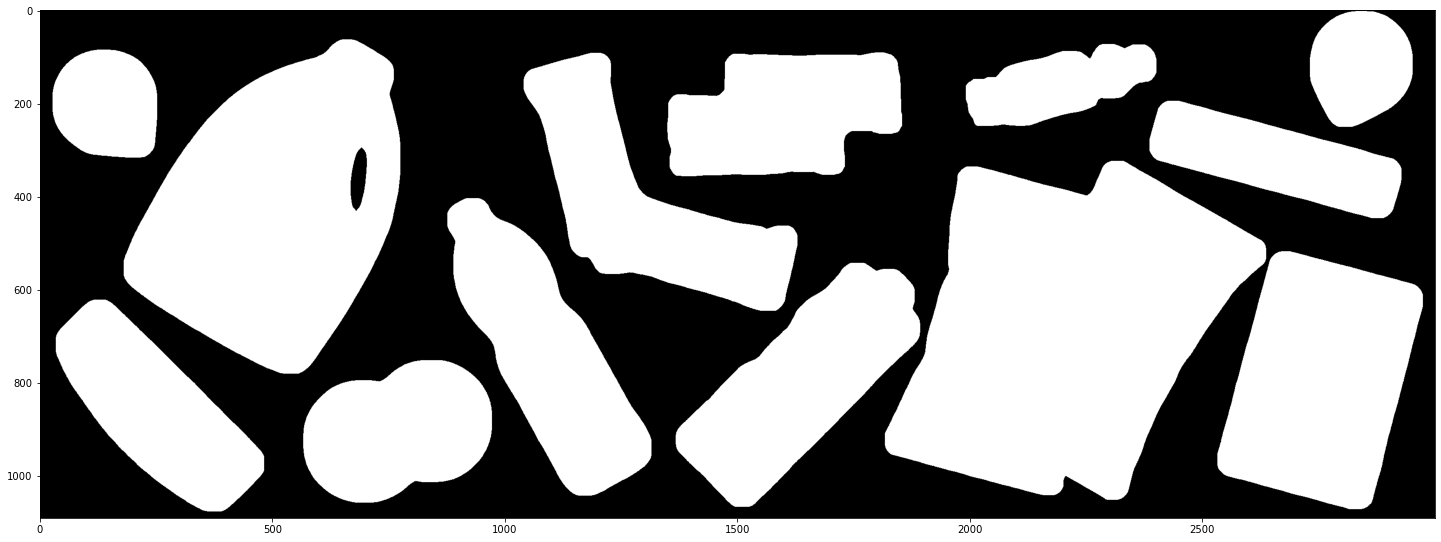

In [6]:
kernel = np.ones((5, 5), np.float32)
image_dilated = cv2.morphologyEx(image_blur, cv2.MORPH_DILATE, kernel, iterations=5)
plt.figure(figsize=(25,15))
plt.imshow(image_dilated,cmap="gray")
plt.show()

In [ ]:
counts = []
count = 14
j = 0
image_erod = image_dilated
kernel = np.ones((3, 3), np.float32)
while count !=0:
    image_erod = cv2.morphologyEx(image_erod, cv2.MORPH_DILATE, kernel, iterations=2)
    image_erod = cv2.morphologyEx(image_erod, cv2.MORPH_ERODE, kernel, iterations=3)
    
    (cnt, hierarchy) = cv2.findContours(image_erod.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    plt.imshow(image_erod,cmap="gray")
    plt.show()
    
    count = len(cnt)
    counts.append(count)
    j+=1
    print("count : ", count)
    print("iterations : ", j)
    print("-----------------------------------")

In [26]:
titles =                 ["مابع ظرف شویی" , "چیپس" ,"روغن" ,  "شیر" , "شامپو" , "چای" ,"تن ماهی" ,"خمیردندان" ,"نوشابه" ,"کیک بستنی" ,"کیک تاینی","بستنی"]
range_of_products =       [[174,176],       [ 0 , 0 ], [79,80], [84,85], [74,75], [140,142],  [0,0],     [53,56],    [53,56],    [0,0],     [0,0],   [80,81]]
range_of_products_double = [[0 ,0  ],       [223,224], [0 ,0 ], [0,  0], [0, 0 ], [ 0 , 0 ],  [105,107],     [0,0],    [0,0],    [67,69],     [122,123],   [0,0]]
prices = [83000,36000,108000,30000,139000,144000,40000,50000,6500,8000,5000,6000]
counts_of_products =[]
sum_of_factor = 0
for i in range(len(titles)):
    counts_of_product = np.abs(counts[range_of_products[i][0]-1] - counts[range_of_products[i][1]-1]) + 2* ( np.abs(counts[range_of_products_double[i][0]-1] - counts[range_of_products_double[i][1]-1]))
    sum_of_factor +=(counts_of_product * prices[i] )
    text = titles[i] + " : تعداد = " + str(counts_of_product) + " عدد - قیمت واحد = "+ str(prices[i])+" تومان" + " - قیمت کل = " + str(counts_of_product * prices[i] )
    print(text)
print("جمع کل فاکتور = " + str(sum_of_factor))
print("تعداد کل اقلام = " + str(sum(counts_of_products)))
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")

price_drinks = counts_of_products[9]*prices[9]+ counts_of_products[11]*prices[11]
print("هزینه بستنی ها : ", price_drinks)



مابع ظرف شویی : تعداد = 1 عدد - قیمت واحد = 83000 تومان - قیمت کل = 83000
چیپس : تعداد = 2 عدد - قیمت واحد = 36000 تومان - قیمت کل = 72000
روغن : تعداد = 1 عدد - قیمت واحد = 108000 تومان - قیمت کل = 108000
شیر : تعداد = 1 عدد - قیمت واحد = 30000 تومان - قیمت کل = 30000
شامپو : تعداد = 1 عدد - قیمت واحد = 139000 تومان - قیمت کل = 139000
چای : تعداد = 1 عدد - قیمت واحد = 144000 تومان - قیمت کل = 144000
تن ماهی : تعداد = 2 عدد - قیمت واحد = 40000 تومان - قیمت کل = 80000
خمیردندان : تعداد = 1 عدد - قیمت واحد = 50000 تومان - قیمت کل = 50000
نوشابه : تعداد = 1 عدد - قیمت واحد = 6500 تومان - قیمت کل = 6500
کیک بستنی : تعداد = 2 عدد - قیمت واحد = 8000 تومان - قیمت کل = 16000
کیک تاینی : تعداد = 2 عدد - قیمت واحد = 5000 تومان - قیمت کل = 10000
بستنی : تعداد = 2 عدد - قیمت واحد = 6000 تومان - قیمت کل = 12000
جمع کل فاکتور = 750500
تعداد کل اقلام = 17
-----------------------------------------------------------------------
-----------------------------------------------------------------------
هزی